In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('texas_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_cases_2_lag', 'new_cases_10_min', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_30_lag', 'current_intensive_care_patients', 'new_cases_150_lag', 'new_cases_7_lag', 'relative_humidity', 'new_deaths_100_std', 'new_deaths_1_lag', 'new_cases_1 lag', 'new_deaths_50_lag', 'new_cases_10_std', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_deaths_2_lag', 'dew_point', 'new_cases_50_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_hospitalized_patients', 'new_cases_4_lag', 'new_cases_10_max']]
covid_test = covid_test[['y', 'new_cases_2_lag', 'new_cases_10_min', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_30_lag', 'current_intensive_care_patients', 'new_cases_150_lag', 'new_cases_7_lag', 'relative_humidity', 'new_deaths_100_std', 'new_deaths_1_lag', 'new_cases_1 lag', 'new_deaths_50_lag', 'new_cases_10_std', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_deaths_2_lag', 'dew_point', 'new_cases_50_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_hospitalized_patients', 'new_cases_4_lag', 'new_cases_10_max']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:9756.16284	validation_1-rmse:31684.69410
[1]	validation_0-rmse:9671.27947	validation_1-rmse:31619.63868
[2]	validation_0-rmse:9587.28688	validation_1-rmse:31555.38615
[3]	validation_0-rmse:9504.17579	validation_1-rmse:31491.97533
[4]	validation_0-rmse:9421.93940	validation_1-rmse:31409.90502
[5]	validation_0-rmse:9340.56774	validation_1-rmse:31348.00330
[6]	validation_0-rmse:9260.05310	validation_1-rmse:31286.91201
[7]	validation_0-rmse:9180.39689	validation_1-rmse:31208.06201
[8]	validation_0-rmse:9101.56100	validation_1-rmse:31105.03424
[9]	validation_0-rmse:9023.54181	validation_1-rmse:31045.98752
[10]	validation_0-rmse:8946.29372	validation_1-rmse:30945.31875
[11]	validation_0-rmse:8869.88991	validation_1-rmse:30887.48169
[12]	validation_0-rmse:8794.02761	validation_1-rmse:30823.64559
[13]	validation_0-rmse:8718.87700	validation_1-rmse:30760.65553
[14]	validation_0-rmse:8644.22121	validation_1-rmse:30701.33133
[15]	validation_0-rmse:8570.35486	validation_1-rms

[128]	validation_0-rmse:3535.86322	validation_1-rmse:24561.36231
[129]	validation_0-rmse:3510.56448	validation_1-rmse:24510.65680
[130]	validation_0-rmse:3486.13473	validation_1-rmse:24459.75514
[131]	validation_0-rmse:3461.31366	validation_1-rmse:24413.09504
[132]	validation_0-rmse:3437.22399	validation_1-rmse:24363.67567
[133]	validation_0-rmse:3413.04150	validation_1-rmse:24314.24514
[134]	validation_0-rmse:3389.25206	validation_1-rmse:24265.62921
[135]	validation_0-rmse:3365.37812	validation_1-rmse:24217.52148
[136]	validation_0-rmse:3342.36259	validation_1-rmse:24169.03556
[137]	validation_0-rmse:3318.73860	validation_1-rmse:24139.54418
[138]	validation_0-rmse:3295.97299	validation_1-rmse:24100.94829
[139]	validation_0-rmse:3273.47868	validation_1-rmse:24054.30185
[140]	validation_0-rmse:3250.91229	validation_1-rmse:24042.66531
[141]	validation_0-rmse:3228.55819	validation_1-rmse:24004.82199
[142]	validation_0-rmse:3206.24874	validation_1-rmse:23982.27935
[143]	validation_0-rmse:3

[255]	validation_0-rmse:1620.53827	validation_1-rmse:21894.54902
[256]	validation_0-rmse:1611.71575	validation_1-rmse:21883.06152
[257]	validation_0-rmse:1603.25665	validation_1-rmse:21867.91223
[258]	validation_0-rmse:1594.87256	validation_1-rmse:21861.93413
[259]	validation_0-rmse:1586.57302	validation_1-rmse:21854.79004
[260]	validation_0-rmse:1578.13664	validation_1-rmse:21849.42019
[261]	validation_0-rmse:1569.93889	validation_1-rmse:21837.93444
[262]	validation_0-rmse:1561.95966	validation_1-rmse:21827.08097
[263]	validation_0-rmse:1553.94955	validation_1-rmse:21812.64797
[264]	validation_0-rmse:1545.87005	validation_1-rmse:21801.45267
[265]	validation_0-rmse:1537.99677	validation_1-rmse:21795.10529
[266]	validation_0-rmse:1529.99439	validation_1-rmse:21780.77674
[267]	validation_0-rmse:1522.25417	validation_1-rmse:21766.62871
[268]	validation_0-rmse:1514.34895	validation_1-rmse:21755.82547
[269]	validation_0-rmse:1506.66893	validation_1-rmse:21739.58402
[270]	validation_0-rmse:1

[382]	validation_0-rmse:891.96587	validation_1-rmse:20506.68677
[383]	validation_0-rmse:888.38190	validation_1-rmse:20500.45068
[384]	validation_0-rmse:884.83988	validation_1-rmse:20494.26114
[385]	validation_0-rmse:881.33704	validation_1-rmse:20488.21748
[386]	validation_0-rmse:877.87744	validation_1-rmse:20482.12173
[387]	validation_0-rmse:874.06510	validation_1-rmse:20475.44144
[388]	validation_0-rmse:870.29847	validation_1-rmse:20468.85503
[389]	validation_0-rmse:866.93330	validation_1-rmse:20462.99625
[390]	validation_0-rmse:863.55139	validation_1-rmse:20456.30433
[391]	validation_0-rmse:859.88451	validation_1-rmse:20449.82028
[392]	validation_0-rmse:856.49331	validation_1-rmse:20444.00397
[393]	validation_0-rmse:853.18384	validation_1-rmse:20437.76886
[394]	validation_0-rmse:849.97749	validation_1-rmse:20432.17621
[395]	validation_0-rmse:846.78192	validation_1-rmse:20425.83651
[396]	validation_0-rmse:843.56626	validation_1-rmse:20419.65323
[397]	validation_0-rmse:840.48407	valida

[511]	validation_0-rmse:597.81590	validation_1-rmse:19965.60217
[512]	validation_0-rmse:595.75214	validation_1-rmse:19962.40289
[513]	validation_0-rmse:594.26658	validation_1-rmse:19959.95053
[514]	validation_0-rmse:592.14310	validation_1-rmse:19956.51889
[515]	validation_0-rmse:590.01778	validation_1-rmse:19953.27087
[516]	validation_0-rmse:588.56532	validation_1-rmse:19950.87023
[517]	validation_0-rmse:586.47606	validation_1-rmse:19947.65183
[518]	validation_0-rmse:585.05073	validation_1-rmse:19945.28485
[519]	validation_0-rmse:582.99711	validation_1-rmse:19942.11538
[520]	validation_0-rmse:580.97768	validation_1-rmse:19939.07651
[521]	validation_0-rmse:579.58625	validation_1-rmse:19936.75756
[522]	validation_0-rmse:577.59903	validation_1-rmse:19933.75244
[523]	validation_0-rmse:575.60318	validation_1-rmse:19931.17302
[524]	validation_0-rmse:574.24516	validation_1-rmse:19928.97548
[525]	validation_0-rmse:572.30921	validation_1-rmse:19926.04220
[526]	validation_0-rmse:570.97620	valida

[640]	validation_0-rmse:442.31534	validation_1-rmse:19708.16038
[641]	validation_0-rmse:441.10703	validation_1-rmse:19707.70582
[642]	validation_0-rmse:440.07355	validation_1-rmse:19705.48217
[643]	validation_0-rmse:439.70003	validation_1-rmse:19703.34504
[644]	validation_0-rmse:439.15956	validation_1-rmse:19701.38879
[645]	validation_0-rmse:437.98593	validation_1-rmse:19701.53717
[646]	validation_0-rmse:436.93788	validation_1-rmse:19699.35368
[647]	validation_0-rmse:435.78158	validation_1-rmse:19699.50149
[648]	validation_0-rmse:434.75035	validation_1-rmse:19697.34109
[649]	validation_0-rmse:433.98483	validation_1-rmse:19695.37148
[650]	validation_0-rmse:432.86653	validation_1-rmse:19695.52640
[651]	validation_0-rmse:431.74400	validation_1-rmse:19695.66596
[652]	validation_0-rmse:430.73178	validation_1-rmse:19693.54378
[653]	validation_0-rmse:429.56869	validation_1-rmse:19693.68266
[654]	validation_0-rmse:428.95767	validation_1-rmse:19691.59459
[655]	validation_0-rmse:427.82787	valida

[769]	validation_0-rmse:350.01804	validation_1-rmse:19578.17783
[770]	validation_0-rmse:349.80801	validation_1-rmse:19576.84965
[771]	validation_0-rmse:349.29067	validation_1-rmse:19576.19573
[772]	validation_0-rmse:348.47572	validation_1-rmse:19575.89748
[773]	validation_0-rmse:347.97628	validation_1-rmse:19576.17802
[774]	validation_0-rmse:347.18113	validation_1-rmse:19575.80561
[775]	validation_0-rmse:346.65853	validation_1-rmse:19575.33492
[776]	validation_0-rmse:346.39539	validation_1-rmse:19574.02749
[777]	validation_0-rmse:345.90520	validation_1-rmse:19574.22255
[778]	validation_0-rmse:345.48658	validation_1-rmse:19572.94045
[779]	validation_0-rmse:344.74720	validation_1-rmse:19572.50935
[780]	validation_0-rmse:344.26045	validation_1-rmse:19572.78824
[781]	validation_0-rmse:343.84943	validation_1-rmse:19571.51952
[782]	validation_0-rmse:343.65013	validation_1-rmse:19570.24435
[783]	validation_0-rmse:343.21431	validation_1-rmse:19570.52293
[784]	validation_0-rmse:342.81212	valida

[898]	validation_0-rmse:291.43937	validation_1-rmse:19528.76139
[899]	validation_0-rmse:291.02177	validation_1-rmse:19528.73299
[900]	validation_0-rmse:290.66314	validation_1-rmse:19528.37885
[901]	validation_0-rmse:290.25305	validation_1-rmse:19528.26206
[902]	validation_0-rmse:289.95022	validation_1-rmse:19528.01937
[903]	validation_0-rmse:289.53215	validation_1-rmse:19527.65945
[904]	validation_0-rmse:289.29255	validation_1-rmse:19527.38479
[905]	validation_0-rmse:288.86934	validation_1-rmse:19526.62840
[906]	validation_0-rmse:288.40722	validation_1-rmse:19526.51397
[907]	validation_0-rmse:288.07426	validation_1-rmse:19526.16639
[908]	validation_0-rmse:287.67576	validation_1-rmse:19526.08390
[909]	validation_0-rmse:287.26675	validation_1-rmse:19525.73183
[910]	validation_0-rmse:286.81464	validation_1-rmse:19525.61891
[911]	validation_0-rmse:286.45016	validation_1-rmse:19525.27758
[912]	validation_0-rmse:286.17770	validation_1-rmse:19525.19334
[913]	validation_0-rmse:285.77552	valida

[1026]	validation_0-rmse:246.22366	validation_1-rmse:19499.38027
[1027]	validation_0-rmse:245.77726	validation_1-rmse:19499.02877
[1028]	validation_0-rmse:245.64598	validation_1-rmse:19498.30178
[1029]	validation_0-rmse:245.26483	validation_1-rmse:19498.10020
[1030]	validation_0-rmse:245.03694	validation_1-rmse:19498.17103
[1031]	validation_0-rmse:244.59412	validation_1-rmse:19498.42294
[1032]	validation_0-rmse:244.15619	validation_1-rmse:19498.19112
[1033]	validation_0-rmse:244.02792	validation_1-rmse:19497.47313
[1034]	validation_0-rmse:243.57802	validation_1-rmse:19497.31926
[1035]	validation_0-rmse:243.34651	validation_1-rmse:19497.39006
[1036]	validation_0-rmse:242.91592	validation_1-rmse:19497.04441
[1037]	validation_0-rmse:242.47549	validation_1-rmse:19497.28214
[1038]	validation_0-rmse:242.13718	validation_1-rmse:19497.30006
[1039]	validation_0-rmse:241.90481	validation_1-rmse:19497.37061
[1040]	validation_0-rmse:241.48160	validation_1-rmse:19497.13728
[1041]	validation_0-rmse:

[1153]	validation_0-rmse:207.32905	validation_1-rmse:19478.32104
[1154]	validation_0-rmse:207.23339	validation_1-rmse:19477.72772
[1155]	validation_0-rmse:206.92127	validation_1-rmse:19477.90320
[1156]	validation_0-rmse:206.61114	validation_1-rmse:19477.30426
[1157]	validation_0-rmse:206.33358	validation_1-rmse:19477.35102
[1158]	validation_0-rmse:206.14570	validation_1-rmse:19477.29734
[1159]	validation_0-rmse:206.01182	validation_1-rmse:19477.27659
[1160]	validation_0-rmse:205.91837	validation_1-rmse:19476.68736
[1161]	validation_0-rmse:205.63015	validation_1-rmse:19476.79866
[1162]	validation_0-rmse:205.47210	validation_1-rmse:19476.68494
[1163]	validation_0-rmse:205.16863	validation_1-rmse:19476.09186
[1164]	validation_0-rmse:204.72175	validation_1-rmse:19475.98049
[1165]	validation_0-rmse:204.49953	validation_1-rmse:19475.35862
[1166]	validation_0-rmse:204.38254	validation_1-rmse:19475.36538
[1167]	validation_0-rmse:204.10028	validation_1-rmse:19475.48993
[1168]	validation_0-rmse:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

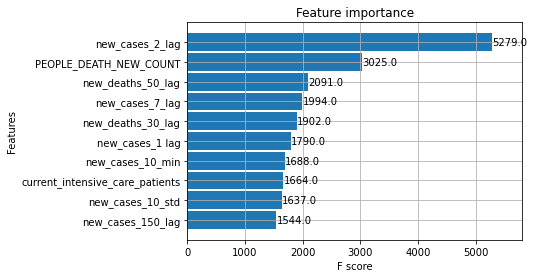

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

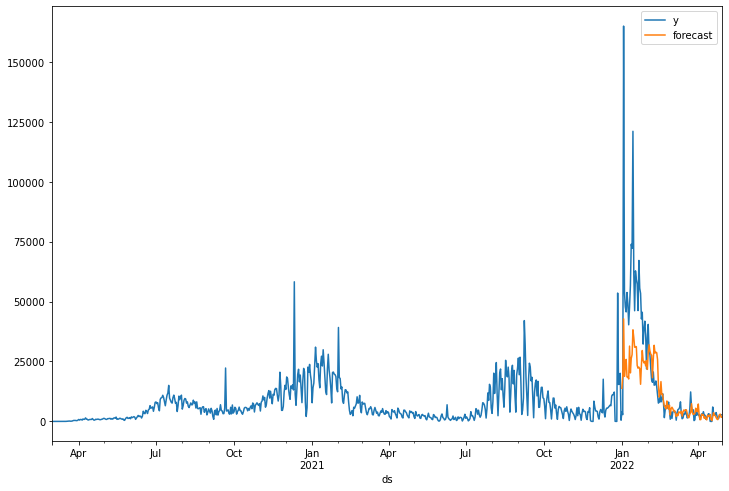

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

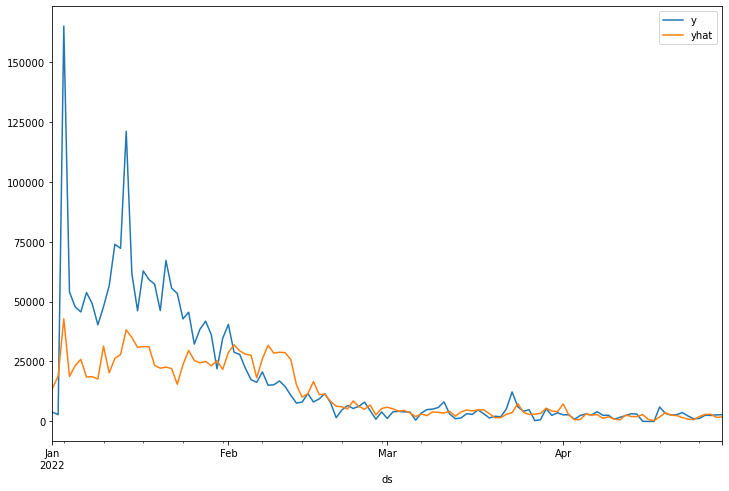

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  19474.371234178638
Test MAE:  9705.400546546743
MASE =  1.4568650745296263


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

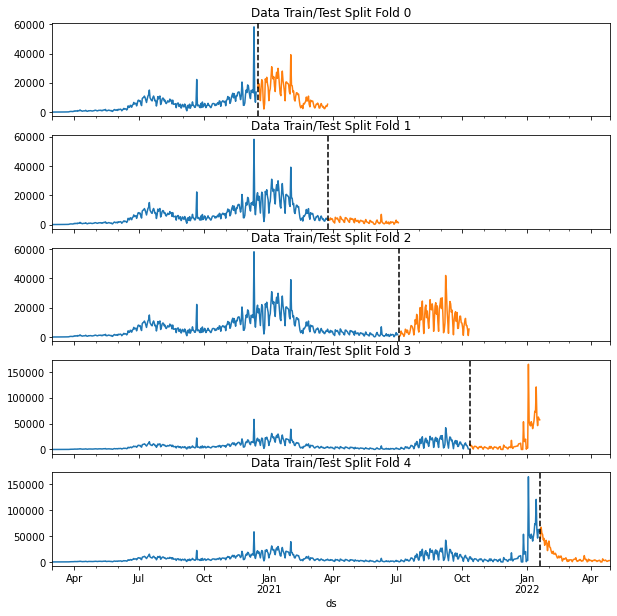

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[23:55:16] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9759.44975	validation_1-rmse:31652.37750
[100]	validation_0-rmse:4752.27263	validation_1-rmse:25037.25302
[200]	validation_0-rmse:3041.20195	validation_1-rmse:21802.48394
[300]	validation_0-rmse:2378.58497	validation_1-rmse:20460.93472
[400]	validation_0-rmse:2031.68370	validation_1-rmse:19930.02649
[500]	validation_0-rmse:1826.87113	validation_1-rmse:19673.19568
[571]	validation_0-rmse:1708.86006	validation_1-rmse:19567.38640
[23:55:17] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9759.44975	validation_1-rmse:31652.37750
[100]	validation_0-rmse:4752.27263	validation_1-rmse:25037.25302
[200]	validation_0-rmse:3041.20195	validation_1-rmse:21802.48394
[300

<AxesSubplot:xlabel='ds'>

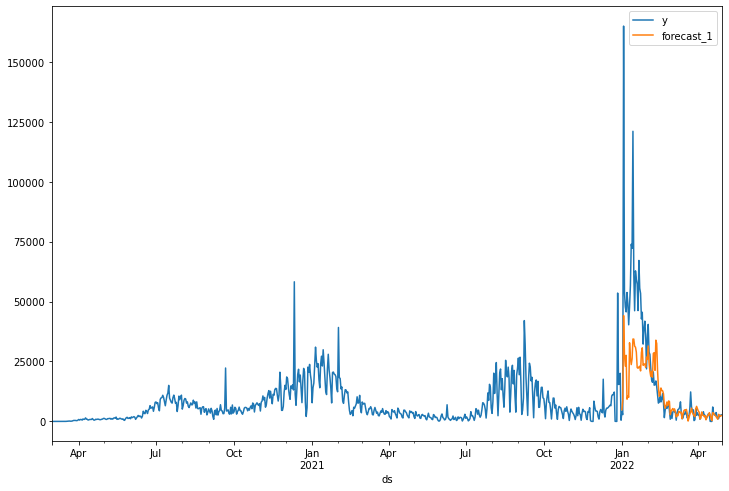

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

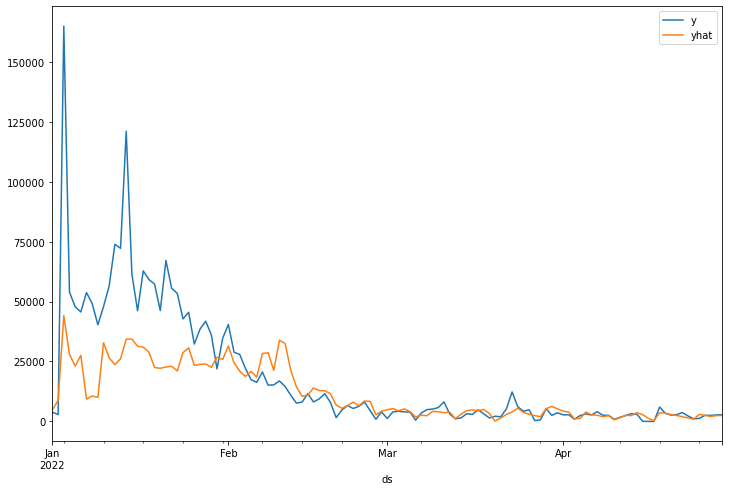

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  19474.371234178638
Test MAE:  9705.400546546743
MASE =  1.4568650745296263
